# Decision Tree

given dataset $D=\left\{(x^{(i)},y^{(i)})\right\}$

decision tree is trying to pick $(feature, value)$ that partition the dataset to subsets

after that partition, elements in each subsets is similar in total, i.e we gain certainty.

continue the process, until we get subset that is very pure or partition too many times.

we thus create a tree called the decision tree. 

when predicting, find leaf subset of that sample, then use typical value of leaf as prediction.

## information gain

we use entropy to measure the uncertainty of data.

for classfication problem, assume $y_{(i)} \in \left\{1,...,k\right\}$, we have the entropy of dataset $D$:

$$H(D) = E(-log\ p_{i}) = -\sum_{i=1}^{k}p_{i}log\ p_{i}$$

$p_{i}$ is the frequency of i-th class, it defines the uncertainty of $D$.

suppose we partition $D$ according to feature $A$ into $D_{1},...,D_{n}$, we have:

$$H(D|A)=\sum_{i=1}^{n}\frac{\#D_{i}}{\#D}H(D_{i})$$

that is: the uncertainty of $D$ after knowing $A$.

information gain is uncertainty loss:

$$g(D,A) = H(D) - H(D|A)$$

decision tree ID3 choose feature $A$ that maximize $g(D,A)$ until:

1. subset is empty
2. information gain $g(D,A)\le\epsilon$

## information gain ratio

if use information gain, we prefer feature $A$ such that $\#A$ is large.

more precisely, we prefer features that is uncertain

$$H_{A}(D) =-\sum_{i=1}^{n}\frac{\#D_{i}}{\#D}log\ \frac{\#D_{i}}{\#D}$$

defines that uncertainty, it is the entropy of viewing category of $A$ as labels.

to fix that problem, we define the information gain ratio:

$$g_{R}(D,A)=\frac{g(D,A)}{H_{A}(D)}=\frac{H(D)-H(D|A)}{H_{A}(D)}$$

algorithm that uses $g_{R}(D,A)$ is C4.5

## pruning

we need to pruning the decision tree $\Rightarrow $ lower model's complexity $\Rightarrow $ mitigate overfit

suppose now we have a decision tree $T$, use $\left | T \right | $ to denote the number of leaves of $T$, and these leaves are $T_{1},...,T_{\left | T \right | }$.

then entropy of leaf $t$: $H(T_{t})$

total entropy of these leaves:

$$C(T) = \sum_{t=1}^{\left | T \right |} \left | T_{t} \right |H(T_{t})$$

we want these minimize this entropy, and at the same time limit model's complexity, give rise to the loss function:

$$C_{\alpha}(T) = C(T) + \alpha\left | T \right |$$

in practice, pruning is from leaves to root.

if pruning a node result in a decrease of the loss function, the operate this pruning.

## CART-classification and regression tree

CART can solve both the classification and regression problem.

CART simply uses different strategies for them.

for regression problem, we try to find feature $j$ and cutting point $s$ that minimize the square error:

$$\underset{j,s}{min}\left[\underset{c_{1}}{min}\sum_{x_{i} \in R_{1}(j, s)}(y_{i} - c_{1})^{2} + \underset{c_{2}}{min}\sum_{x_{i} \in R_{2}(j, s)}(y_{i} - c_{2})^{2}\right]$$

rather than optimizing information gain or information gain ratio.

CART optimize Gini-index when facing a classification problem:

$$Gini(D) = E(1 - p_{i}) = \sum_{i=1}^{k}p_{i}(1 - p_{i})$$

here, rather than self-information $-log\ p_{i}$ uses in entropy, we use $1 - p_{i}$ to indicate the information of event with probability $p_{i}$.

## Practice using sklearn

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]  # petal length and width
y = iris.target

In [2]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

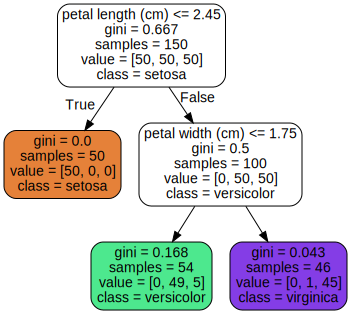

In [3]:
"""visualize using graphviz, need 1.pip install graphviz, 2.brew install graphviz"""
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(tree_clf,
                out_file="iris_tree.dot",
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True
               )

Source.from_file("iris_tree.dot")

In [4]:
tree_clf.predict_proba([[5, 1.5]]), tree_clf.predict([[5, 1.5]])

(array([[0.        , 0.90740741, 0.09259259]]), array([1]))

In [5]:
"""criterion can switch from gini to entropy"""
entropy_tree_clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [6]:
"""hyper-parameters for regularization"""
regularized_tree_clf = DecisionTreeClassifier(max_depth=5,  # maximum depth of that tree
                                              max_leaf_nodes=20,  # maximum number of leaf nodes
                                              max_features=8,  # maximum number of features when splitting each node
                                              min_samples_split=10,  # min number of samples of a node before it can split
                                              min_samples_leaf=4,  # min number of samples of a leaf node
                                              min_weight_fraction_leaf=0.01  # same as min_samples_leaf, but by weight frac
                                             )

In [7]:
"""CART(sklearn uses) can also regression"""
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=3)

### moon dataset

In [8]:
"""make moon dataset"""
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=10000, noise=0.4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
"""grid search"""
from sklearn.model_selection import GridSearchCV

param_grid = [{"max_leaf_nodes": [2, 5, 10, 20], "min_samples_split": [3, 4]}]

tree_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(tree_clf, param_grid, cv=3, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] max_leaf_nodes=2, min_samples_split=3 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=3, score=0.772, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=3 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=3, score=0.781, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=3 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=3, score=0.771, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=4 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=4, score=0.772, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=4 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=4, score=0.781, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=4 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=4, score=0.771, total=   0.0s
[CV] max_leaf_nodes=5, min_samples_split=3 ...........................
[CV]  max_l

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.1s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_leaf_nodes': [2, 5, 10, 20],
                          'min_samples_split': [3, 4]}],
             verbose=3)

In [10]:
"""using best estimator to predict"""
from sklearn.metrics import accuracy_score

y_predict = grid_search.predict(X_test)
accuracy_score(y_true=y_test, y_pred=y_predict)

0.842

### using multiple trees

In [11]:
"""generate 1000 subsets, each 100 instances"""
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)  
# make train_size = len(X_train) - (len(X_train) - n_instances) = n_instances

for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

In [12]:
"""train each subset on grid_search.best_estimator_"""
from sklearn.base import clone
import numpy as np

forest = [clone(grid_search.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.8168704999999999

In [13]:
"""save all predictions"""
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [14]:
"""use majority vote, improve performance"""
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)
accuracy_score(y_test, y_pred_majority_votes.reshape(-1))

0.852